In [490]:
import pandas as pd 
import pandas_datareader as pdr  
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats 
import math
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


## DataLoad

In [491]:
# data Load

#필라델피아 반도체지수
sox_df = pd.read_csv('/Users/kyungmo/Desktop/project/sox_df.csv',
                     index_col='Date',
                     parse_dates=True)
#변동성지수 vix
vix_df = pd.read_csv('/Users/kyungmo/Desktop/project/vix_df.csv',
                     index_col='Date',
                     parse_dates=True)
#snp500지수
df = pd.read_csv('/Users/kyungmo/Desktop/project/s&p500.csv',
                        index_col='Date',
                        parse_dates=True)

In [651]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,SOX,VIX
Date,,,,,,,,
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,1858.589966,13.43
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039,1844.390015,14.82
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029,1849.619995,13.78
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,1887.910034,12.47
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,1853.979980,14.02


## Data Join

In [492]:
#여러 csv파일을 한 df로 join

sox_df = sox_df.loc[:,['Close']].copy()
sox_df.rename(columns={'Close':'SOX'},inplace=True)
vix_df = vix_df.loc[:,['Close']].copy()
vix_df.rename(columns={'Close':'VIX'},inplace=True)

df = df.join(sox_df,how='left')
df = df.join(vix_df,how='left')

In [493]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,SOX,VIX
Date,,,,,,,,
1999-12-31,1472.420044,1458.189941,1464.469971,1469.250000,374050000,1469.250000,704.559998,24.639999
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,713.200012,24.209999
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,687.320007,27.010000
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,678.539978,26.410000
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,669.330017,25.730000


In [494]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,SOX,VIX
Date,,,,,,,,
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,1858.589966,13.43
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039,1844.390015,14.82
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029,1849.619995,13.78
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,1887.910034,12.47
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,1853.979980,14.02


In [495]:
df.iloc[:,0]

Date
1999-12-31    1472.420044
2000-01-03    1478.000000
2000-01-04    1455.219971
2000-01-05    1413.270020
2000-01-06    1411.900024
                 ...     
2019-12-27    3247.929932
2019-12-30    3240.919922
2019-12-31    3231.719971
2020-01-02    3258.139893
2020-01-03    3246.149902
Name: High, Length: 5034, dtype: float64

Text(0, 0.5, 'price')

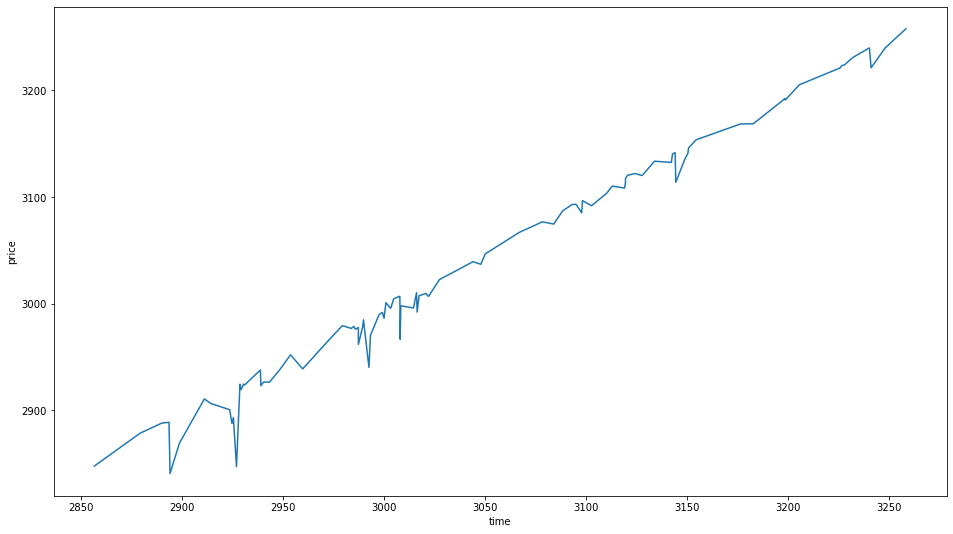

In [496]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Close'], x=df.iloc[-100:-1,0])
plt.xlabel('time')
plt.ylabel('price')

In [497]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'SOX', 'VIX'], dtype='object')

In [498]:
df

,High,Low,Open,Close,Volume,Adj Close,SOX,VIX
Date,,,,,,,,
1999-12-31,1472.420044,1458.189941,1464.469971,1469.250000,374050000,1469.250000,704.559998,24.639999
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,713.200012,24.209999
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,687.320007,27.010000
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,678.539978,26.410000
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,669.330017,25.730000
...,...,...,...,...,...,...,...,...
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,1858.589966,13.430000
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039,1844.390015,14.820000
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029,1849.619995,13.780000


## 데이터 scaling



In [603]:
scaler = MinMaxScaler()
scale_cols = ['High', 'Low', 'Close', 'SOX', 'VIX']
              
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols


In [627]:
train = df_scaled[:-1000]
test = df_scaled[-1000:]


In [628]:
def make_dataset(data, label, window_size=30):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

## Data Split

In [629]:

feature_cols = ['High', 'Low', 'SOX', 'VIX']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]


#train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 30)

# train, validation set 생성
from sklearn.model_selection import train_test_split
train, val, train_label, val_label = train_test_split(train_feature, train_label, test_size=0.1)


# test dataset
test_feature = test[feature_cols]
test_label = test[label_cols]
test, test_label = make_dataset(test_feature, test_label, 30)






In [630]:
train.shape

(3603, 30, 4)

In [631]:
val.shape

(401, 30, 4)

In [632]:
test.shape

(970, 30, 4)

## CNN 모델 구축

In [653]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(30,4)))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(1, activation='linear'))
model_cnn.compile(loss='mse', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [690]:

history = model_cnn.fit(train, train_label, 
                    epochs=500, 
                    batch_size=100,
                    validation_data=(val,val_label), 
                    callbacks=[early_stop])

Epoch 1/500
37/37 [==============================] - 1s 19ms/step - loss: 4.3517e-05 - val_loss: 7.2164e-05
Epoch 2/500
37/37 [==============================] - 1s 25ms/step - loss: 3.9316e-05 - val_loss: 6.4974e-05
Epoch 3/500
37/37 [==============================] - 1s 23ms/step - loss: 5.1494e-05 - val_loss: 4.7081e-05
Epoch 4/500
37/37 [==============================] - 1s 21ms/step - loss: 6.3916e-05 - val_loss: 1.0838e-04
Epoch 5/500
37/37 [==============================] - 1s 27ms/step - loss: 5.7344e-05 - val_loss: 4.0950e-05
Epoch 6/500
37/37 [==============================] - 1s 26ms/step - loss: 4.2031e-05 - val_loss: 4.9754e-05
Epoch 7/500
37/37 [==============================] - 1s 20ms/step - loss: 4.4860e-05 - val_loss: 1.0471e-04
Epoch 8/500
37/37 [==============================] - 1s 22ms/step - loss: 4.7922e-05 - val_loss: 1.3741e-04
Epoch 9/500
37/37 [==============================] - 1s 19ms/step - loss: 6.1124e-05 - val_loss: 3.5932e-05
Epoch 10/500
37/37 [========

In [656]:
print(model_cnn.summary())

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 28, 128)           1664      
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 26, 64)            24640     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 13, 64)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 832)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 100)               83300     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 101       
Total params: 109,705
Trainable params: 109,705
Non-trainable params: 0
_______________________________________________

In [657]:
# cnn예측

y_hat = model.predict(test)
y_hat.shape

(970, 1)

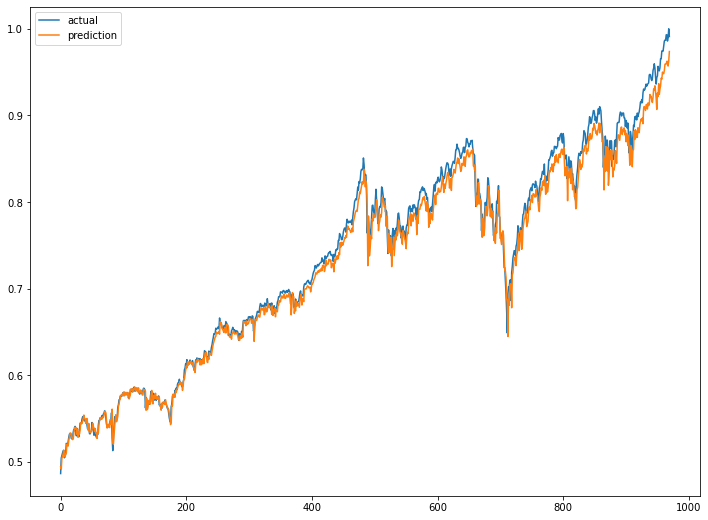

In [688]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(y_hat, label='prediction')
plt.legend()
plt.show()

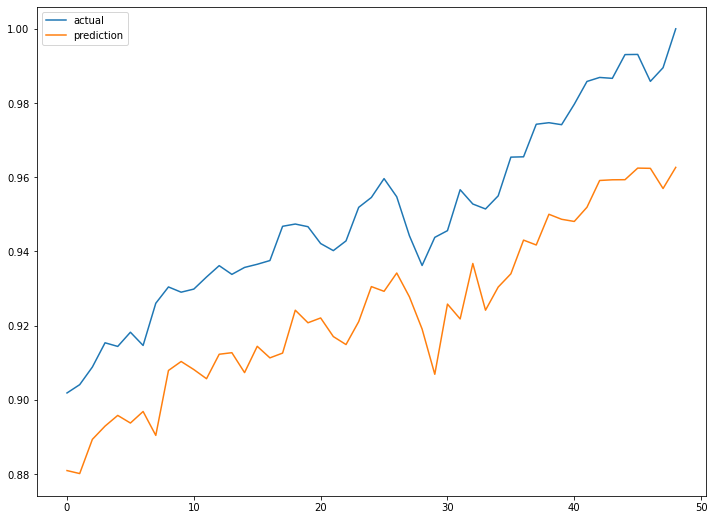

In [689]:
plt.figure(figsize=(12, 9))
plt.plot(test_label[-50:-1,:], label='actual')
plt.plot(y_hat[-50:-1,:], label='prediction')
plt.legend()
plt.show()

In [666]:
test_label.shape

(970, 1)

## LSTM모델 구축

In [612]:
# from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.models import Sequential


In [678]:


from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units = 50,
               return_sequences = False,
               input_shape=(train.shape[1], train.shape[2]), 
               activation='tanh'))


model.add(Dense(units = 1,activation='linear'))


model.compile(loss='mean_squared_error',optimizer='adam',metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [679]:
history = model.fit(train, train_label, 
                    epochs=500, 
                    batch_size=100,
                    validation_data=(val,val_label), 
                    callbacks=[early_stop]  )

Epoch 1/500
37/37 [==============================] - 4s 28ms/step - loss: 0.0098 - accuracy: 2.7755e-04 - val_loss: 6.5371e-04 - val_accuracy: 0.0000e+00
Epoch 2/500
37/37 [==============================] - 1s 19ms/step - loss: 3.7221e-04 - accuracy: 2.7755e-04 - val_loss: 1.5367e-04 - val_accuracy: 0.0000e+00
Epoch 3/500
37/37 [==============================] - 1s 19ms/step - loss: 1.3961e-04 - accuracy: 2.7755e-04 - val_loss: 1.0331e-04 - val_accuracy: 0.0000e+00
Epoch 4/500
37/37 [==============================] - 1s 21ms/step - loss: 1.2569e-04 - accuracy: 2.7755e-04 - val_loss: 9.2897e-05 - val_accuracy: 0.0000e+00
Epoch 5/500
37/37 [==============================] - 1s 20ms/step - loss: 1.1795e-04 - accuracy: 2.7755e-04 - val_loss: 8.5350e-05 - val_accuracy: 0.0000e+00
Epoch 6/500
37/37 [==============================] - 1s 24ms/step - loss: 1.1067e-04 - accuracy: 2.7755e-04 - val_loss: 8.1911e-05 - val_accuracy: 0.0000e+00
Epoch 7/500
37/37 [==============================] - 2s 

37/37 [==============================] - 2s 52ms/step - loss: 6.0062e-05 - accuracy: 2.7755e-04 - val_loss: 4.6130e-05 - val_accuracy: 0.0000e+00
Epoch 53/500
37/37 [==============================] - 1s 36ms/step - loss: 6.1119e-05 - accuracy: 2.7755e-04 - val_loss: 4.6016e-05 - val_accuracy: 0.0000e+00
Epoch 54/500
37/37 [==============================] - 2s 50ms/step - loss: 6.0876e-05 - accuracy: 2.7755e-04 - val_loss: 6.2098e-05 - val_accuracy: 0.0000e+00
Epoch 55/500
37/37 [==============================] - 2s 46ms/step - loss: 7.1826e-05 - accuracy: 2.7755e-04 - val_loss: 5.3118e-05 - val_accuracy: 0.0000e+00
Epoch 56/500
37/37 [==============================] - 2s 59ms/step - loss: 6.1766e-05 - accuracy: 2.7755e-04 - val_loss: 4.6068e-05 - val_accuracy: 0.0000e+00
Epoch 57/500
37/37 [==============================] - 2s 50ms/step - loss: 5.9471e-05 - accuracy: 2.7755e-04 - val_loss: 5.0200e-05 - val_accuracy: 0.0000e+00
Epoch 58/500
37/37 [==============================] - 2s 55

37/37 [==============================] - 1s 32ms/step - loss: 4.9260e-05 - accuracy: 2.7755e-04 - val_loss: 4.1533e-05 - val_accuracy: 0.0000e+00
Epoch 104/500
37/37 [==============================] - 2s 44ms/step - loss: 5.1777e-05 - accuracy: 2.7755e-04 - val_loss: 3.7006e-05 - val_accuracy: 0.0000e+00
Epoch 105/500
37/37 [==============================] - 1s 25ms/step - loss: 5.6659e-05 - accuracy: 2.7755e-04 - val_loss: 3.8882e-05 - val_accuracy: 0.0000e+00
Epoch 106/500
37/37 [==============================] - 2s 44ms/step - loss: 5.0955e-05 - accuracy: 2.7755e-04 - val_loss: 3.7986e-05 - val_accuracy: 0.0000e+00
Epoch 107/500
37/37 [==============================] - 2s 60ms/step - loss: 4.6523e-05 - accuracy: 2.7755e-04 - val_loss: 3.7639e-05 - val_accuracy: 0.0000e+00
Epoch 108/500
37/37 [==============================] - 2s 51ms/step - loss: 4.9788e-05 - accuracy: 2.7755e-04 - val_loss: 9.8412e-05 - val_accuracy: 0.0000e+00
Epoch 109/500
37/37 [==============================] -

37/37 [==============================] - 1s 23ms/step - loss: 4.6550e-05 - accuracy: 2.7755e-04 - val_loss: 3.6201e-05 - val_accuracy: 0.0000e+00
Epoch 155/500
37/37 [==============================] - 1s 27ms/step - loss: 4.3705e-05 - accuracy: 2.7755e-04 - val_loss: 3.2744e-05 - val_accuracy: 0.0000e+00
Epoch 156/500
37/37 [==============================] - 1s 27ms/step - loss: 4.0354e-05 - accuracy: 2.7755e-04 - val_loss: 3.2394e-05 - val_accuracy: 0.0000e+00
Epoch 157/500
37/37 [==============================] - 1s 27ms/step - loss: 4.1261e-05 - accuracy: 2.7755e-04 - val_loss: 3.5931e-05 - val_accuracy: 0.0000e+00
Epoch 158/500
37/37 [==============================] - 1s 36ms/step - loss: 4.1948e-05 - accuracy: 2.7755e-04 - val_loss: 3.3558e-05 - val_accuracy: 0.0000e+00
Epoch 159/500
37/37 [==============================] - 1s 30ms/step - loss: 4.3077e-05 - accuracy: 2.7755e-04 - val_loss: 3.1974e-05 - val_accuracy: 0.0000e+00
Epoch 160/500
37/37 [==============================] -

37/37 [==============================] - 1s 37ms/step - loss: 4.0637e-05 - accuracy: 2.7755e-04 - val_loss: 3.3108e-05 - val_accuracy: 0.0000e+00
Epoch 206/500
37/37 [==============================] - 1s 39ms/step - loss: 4.2504e-05 - accuracy: 2.7755e-04 - val_loss: 3.2450e-05 - val_accuracy: 0.0000e+00
Epoch 207/500
37/37 [==============================] - 1s 26ms/step - loss: 4.1922e-05 - accuracy: 2.7755e-04 - val_loss: 3.3548e-05 - val_accuracy: 0.0000e+00
Epoch 208/500
37/37 [==============================] - 1s 30ms/step - loss: 4.0325e-05 - accuracy: 2.7755e-04 - val_loss: 8.0057e-05 - val_accuracy: 0.0000e+00
Epoch 209/500
37/37 [==============================] - 1s 27ms/step - loss: 5.1701e-05 - accuracy: 2.7755e-04 - val_loss: 3.3495e-05 - val_accuracy: 0.0000e+00
Epoch 210/500
37/37 [==============================] - 1s 28ms/step - loss: 4.0334e-05 - accuracy: 2.7755e-04 - val_loss: 3.6981e-05 - val_accuracy: 0.0000e+00
Epoch 211/500
37/37 [==============================] -

In [661]:
print(model.summary()) 

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 50)                11000     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 51        
Total params: 11,051
Trainable params: 11,051
Non-trainable params: 0
_________________________________________________________________
None


In [662]:
# LSTM 예측.

y_hat = model.predict(test)
y_hat.shape

(970, 1)

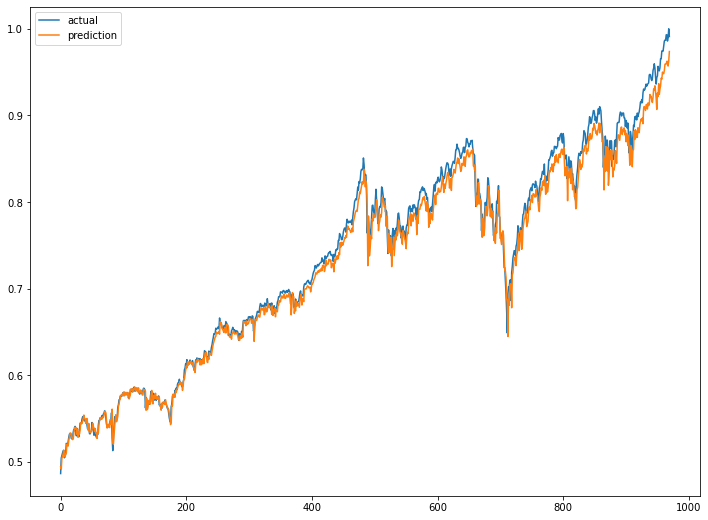

In [663]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(y_hat, label='prediction')
plt.legend()
plt.show()

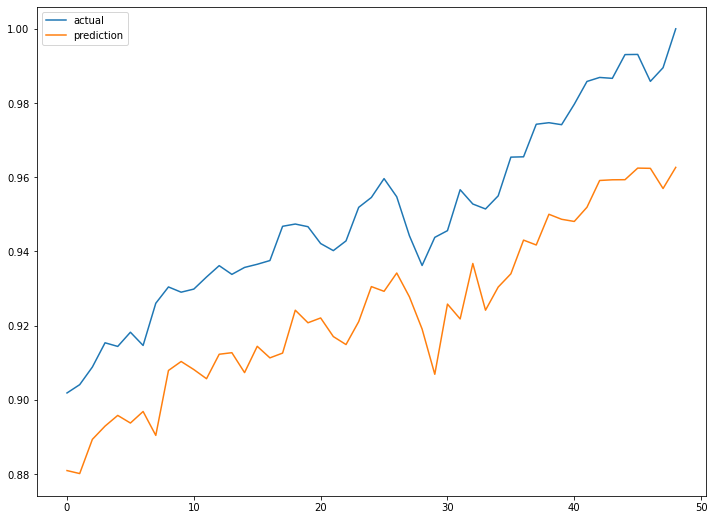

In [686]:
plt.figure(figsize=(12, 9))
plt.plot(test_label[-50:-1,:], label='actual')
plt.plot(y_hat[-50:-1,:], label='prediction')
plt.legend()
plt.show()